# Codeology Workshop 2: Introduction to Machine Learning Pt. 2

## 3/11/19

## Hosted by and maintained by [Codeology](https://www.codeology.club). Originally authored by [Calvin Chen](mailto:chencalvin99@berkeley.edu), [Micah Harrison](mailto:mharrison08@berkeley.edu), and [Sai Kapuluru](mailto:saikapuluru@berkeley.edu).

## Introduction

Welcome everybody to Codeology's second-ever workshop! We'll be getting into some more M A C H I N E L E A R N I N G today, more specifically, into Neural Networks! Let's dive right into one of the biggest *buzzwords* in Machine Learning today, and see why it is so!

## Recap of Last Week

For those who weren't here last week, we'll be touching upon some of the same topics from last time, so we'll take a quick minute or so to get you guys up to speed with what's needed so you guys'll know what's going on!

**Loss Functions**: A function that calculates how inaccurate your model is against some given dataset. The one particular function we'll be using today is the **Mean Squared Error**, where we essentially **find the average of the squares between the actual values and our predicted values**. Don't worry if some parts of this don't make that much sense now, we'll be getting more into Loss Functions later on, and how they apply to different models to help optimize them!

**Training Our Model**: We'll refer to the process of training our model time and time again, but this can essentially be abstracted away as the process through which **our model is fitting itself against our given dataset**, allowing it to better predict other similar inputs in the future better.

**Validation**: A process through which we're able to determine how well our model is doing. We split our dataset into thirds: **60% of dataset to the training data**, **20% of the dataset to the validation set**, and **20% of the dataset to the test set**. We train a bunch of different models on the training set, determine which one has the lowest *loss*, or highest accuracy, on the validation set, and finally choose the most accurate one and determine how well it did against the final **test set**.

Now that we've defined a few of the key terms from last week that we'll be using this week, let's get into the new stuff!

## Why Neural Networks + The Motivaiton Behind Creating One

Neural Networks derive their name form the neural network we have in our head- our brain. In a very highly simplified model, the brain is a collection of neurons that receives electrical input signals from dendrites, outputting electrical signals via a single axon. Each neuron sends signals along a single axon and connects with other dendrites.

<img src= "images/neuron_connection.gif">

Neural Networks attempt to model this by having artificial layers of neurons that perform minor tasks, then communicate from layer to layer. The collection of neurons operate together to begin to understand the raw input in layers- in each layer, the neurons summarize the data a little bit further, until they finally arrive at a single label. So this process of gradual learning is the reason why we're motivated to construct such a network (especially also because the neural networks in our brain work so well), and why we construct such networks in Machine Learning!

So, this process of gradual learning basically sums up the **feed-forward Neural Network**, which is what we'll be exploring today!

In order for us to learn about how a Neural Networks, we can break it down into three key components:
1. **The Single Neuron + The Single Layer**
2. **Forward Propagation**
    1. **Activation Functions**
    2. **Loss Functions**
    3. **Gradient Descent**
3. **Backpropagation**

We'll be diving deep into all three of the topics today, so get to learn about one of the biggest buzzwords in Machine Learning!

# Neural Network Framework

## Single Neuron

"A single neuron transforms given input into some output. Depending on the given input and weights assigned to each input, decide whether the neuron fired or not. Let’s assume the neuron has 3 input connections and one output" (Wikipedia.org)

## Single Layer

Below is a simple Neural Network. There are two input, two hidden, and one output node. Information flows from the input nodes to the hidden nodes and finally to the output node. w stands for weight: they represent how much of an effect an input has on the next node.

<img src="images/single-neuron.jpg">

# Forward Proagation

## Calculations

<img src="images/framework-jpg.png">

## Activation Functions

Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable. They introduce non-linear properties to our Network. Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.

Specifically in A-NN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer.

If we do not apply a Activation function then the output signal would simply be a simple linear function. Linear functions have their use (as shown last time) but they are limited by their simplicity. Non-linear functions help to capture patterns in data that might be too complex for a linear model to recognize.

Also another important feature of a Activation function is that it should be differentiable for backpropagation later.

![y_hat](images/y_hat.png)

### Sigmoid

Sigmoid Activation function: It is a activation function of form f(x) = 1 / 1 + exp(-x) . Its Range is between 0 and 1. It is a S — shaped curve. It is easy to understand and apply but it has major reasons which have made it fall out of popularity -

$$
\sigma (x) = \frac{1}{1+e^{-x}} \newline
\frac{d\sigma (x)}{d(x)} = \sigma (x)\cdot (1-\sigma(x))
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(-4, 4, 0.01)

def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))
sig = sigmoid_array(x)
plt.axvline(color='black')
plt.axhline(color='black')
plt.axhline(np.median(sig), color = 'g', linestyle = '--')
plt.ylim(-.5, 1)
plt.plot(x, sig)
plt.show()

<Figure size 640x480 with 1 Axes>

### Relu

It’s just R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent . A lot of times in Machine learning and computer science we notice that most simple and consistent techniques and methods are only preferred and are best. Almost all deep learning Models use ReLu nowadays. But its limitation is that it should only be used within Hidden layers of a Neural Network Model.

In [ ]:
x = np.arange(-4, 4, 0.01)

def relu(x):                                        
    return [max(0,elem) for elem in x]

re = relu(x)
plt.axvline(color='black', linestyle = "--")
plt.axhline(color='black', linestyle = "--")
plt.ylim(-.5, 1)
plt.plot(x, re)
plt.show()

## Loss Functions

In order to monitor our progress and make sure that we are moving in right direction, we should routinely calculate the value of the loss function. Generally speaking, the loss function is designed to show how far we are from the ‘ideal’ solution. It is selected according to the problem we plan to solve, and frameworks such as Pytorch have many options to choose from.


Each of the neural network's weights receives an update proportional to the partial derivative of the loss function with respect to the current weight in each iteration of training

Vanashing Gradient Problem: the gradient will be vanishingly small, effectively preventing the weight from changing its value.

$$
\begin{aligned}
\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})=\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)\newline
f(\mathbf{x}^{(i)},\boldsymbol{\theta}) = \hat{y}^{(i)} \newline
L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta}))=\frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2}\newline
\frac{\partial\boldsymbol{\mathcal{L}}}{\partial\boldsymbol{\theta}}=-(y-\sigma(\mathbf{z}))\cdot\sigma’(\mathbf{z})\cdot\mathbf{x}
\end{aligned}
$$

$$
\begin{aligned}
\boldsymbol{\theta}^{*} & =\arg\min_{\boldsymbol{\theta}}\boldsymbol{\mathcal{L}}(\boldsymbol{\theta})+\lambda\cdot\Phi(\boldsymbol{\theta})\newline
& =\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},\hat{y}^{(i)}\big)+\lambda\cdot\Phi(\boldsymbol{\theta})\newline
& =\arg\min_{\boldsymbol{\theta}}\frac{1}{n}\sum_{i=1}^{n}L\big(y^{(i)},f(\mathbf{x}^{(i)},\boldsymbol{\theta})\big)+\lambda\cdot\Phi(\boldsymbol{\theta})
\end{aligned}
$$


# Backpropagation

Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases.
In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

So, each iteration of the training process consists of the following steps:
1. Calculating the predicted output ŷ, known as feedforward
2. Updating the weights and biases, known as backpropagation

![backprop](images/backprop.png)

## Gradient Descent

<img src="images/gradient-descent.png">

# The Process

<img src="images/more-framework.png">

<img src="images/process.gif">

# DEMO TIME BABY

Now that you've learned about all the different components of a Neural Network, let's take a look at how we can incorporate all of it together.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, random
import matplotlib.pyplot as plt
import numpy as np

Lets create some data. We create the data that represents the X^2 curve. We generate 1000 points of this data. 

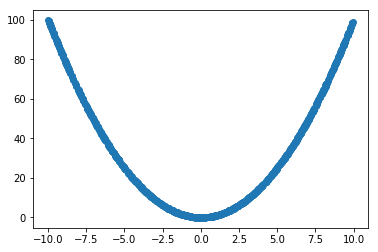

In [2]:
X = []
Y = []

for _ in range(1000):
    randX = random.uniform(-10, 10)
    X.append(randX)
    Y.append(randX ** 2)
X = np.array(X)
Y = np.array(Y)

Y += np.random.normal(0, 0.1, len(Y))

plt.scatter(X, Y)


Define our Neural Net. Our goal is to model the underlying distribution (X^2) using our neural net.

In [3]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(1, 120)
        self.fc2 = nn.Linear(120, 120)
        self.fc3 = nn.Linear(120, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

net = Net()
print(net)

optimizer = torch.optim.SGD(net.parameters(), lr=0.0001)
net.zero_grad()

Net(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=1, bias=True)
)


Train!! For 5000 iterations, we pick one random training point and we train our model.

In [4]:
for i in range(5000):
    dataIndices = [random.randint(0, 999)]
    Xdata = torch.tensor(X[dataIndices], dtype=torch.float)
    predictions = net(Xdata)
    labels = torch.tensor(Y[dataIndices], dtype=torch.float)
    loss = loss_func(predictions, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Once our model is all trained, we plot 1000 points uniformly and see what kind of distribution our model has captured. We want this to be as close
to the true underlying distribution (X^2) as possible.

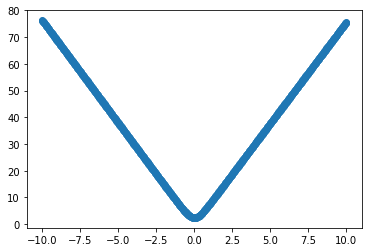

In [5]:
x = np.linspace(-10, 10, num=1000)
predictions = []
for i in range(1000):
    y = net(torch.tensor([x[i]], dtype=torch.float)).data[0].item()
    predictions.append(y)
    
plt.scatter(x, predictions)

# Congrats! You officially know the inner workings on Neural Networks!

In other words, you guys are **MACHINE LEARNERS**! We went through a lot of different topics today, so don't fret if some things felt confusing or if you don't necessarily have a great grasp on it all. We primarily wanted to make sure you guys got enough exposure to the different componentsm, and know the general process for the construction of a **Neural Network**! Feel free to reach out to any of us any time about different questions you might have had about the notebook (or Machine Learning in general) and we'd be glad to respond! (Our emails are at the topic because we're uber official, but feel free to DM us as well on Slack/Messenger!)